# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [2]:
print("The objective is to conduct exploratory data analysis (EDA) and predictive modeling to discern the factors influencing the pricing of used cars. This involves extracting insights from a dataset of 426K cars, focusing on features such as mileage, age, brand, model, and other relevant attributes. The aim is to develop a regression model that accurately predicts car prices based on these features, thereby providing actionable insights to optimize pricing strategies for the dealership.")

The objective is to conduct exploratory data analysis (EDA) and predictive modeling to discern the factors influencing the pricing of used cars. This involves extracting insights from a dataset of 426K cars, focusing on features such as mileage, age, brand, model, and other relevant attributes. The aim is to develop a regression model that accurately predicts car prices based on these features, thereby providing actionable insights to optimize pricing strategies for the dealership.


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r'C:\Users\sriva\Downloads\practical_application_II_starter\data\vehicles.csv')  
print(df.head())

           id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  NaN         NaN    az  
1  NaN  NaN         NaN    ar  
2 

In [5]:
print(df.columns)

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')


In [6]:
print(df.dtypes)

id                int64
region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
state            object
dtype: object


In [7]:
print(df.describe())

                 id         price           year      odometer
count  4.268800e+05  4.268800e+05  425675.000000  4.224800e+05
mean   7.311487e+09  7.519903e+04    2011.235191  9.804333e+04
std    4.473170e+06  1.218228e+07       9.452120  2.138815e+05
min    7.207408e+09  0.000000e+00    1900.000000  0.000000e+00
25%    7.308143e+09  5.900000e+03    2008.000000  3.770400e+04
50%    7.312621e+09  1.395000e+04    2013.000000  8.554800e+04
75%    7.315254e+09  2.648575e+04    2017.000000  1.335425e+05
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07


In [8]:
print(df.isnull().sum())

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


In [9]:
# Impute missing values for 'year' with median
median_year = df['year'].median()
df['year'].fillna(median_year, inplace=True)

# Impute missing values for 'odometer' with mean
mean_odometer = df['odometer'].mean()
df['odometer'].fillna(mean_odometer, inplace=True)

# Impute missing categorical values with mode
categorical_columns = ['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission',
                       'drive', 'size', 'type', 'paint_color']

for col in categorical_columns:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

# Drop columns with a large number of missing values that are not relevant
df.drop(['VIN', 'size'], axis=1, inplace=True)

In [10]:
# Explore categorial values
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(col, ':', df[col].nunique(), 'unique values')
    print(df[col].value_counts(), '\n')

region : 404 unique values
region
columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
                           ... 
meridian                     28
southwest MS                 14
kansas city                  11
fort smith, AR                9
west virginia (old)           8
Name: count, Length: 404, dtype: int64 

manufacturer : 42 unique values
manufacturer
ford               88631
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
maz

In [13]:
import pandas as pd

# Handling missing values for categorical variables
categorical_columns = ['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 
                       'transmission', 'drive', 'type', 'paint_color']

# Fill missing categorical values with mode
for col in categorical_columns:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

# Handle 'state' column separately (optional)
df['state'].fillna('Unknown', inplace=True)

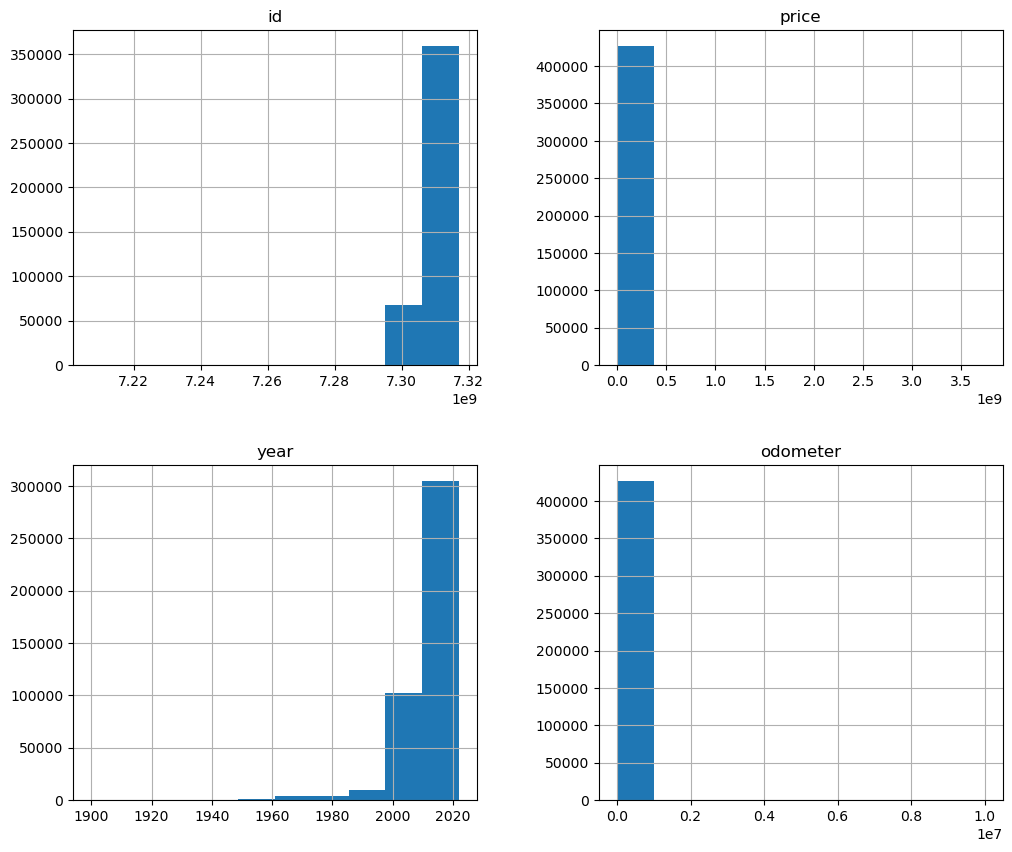

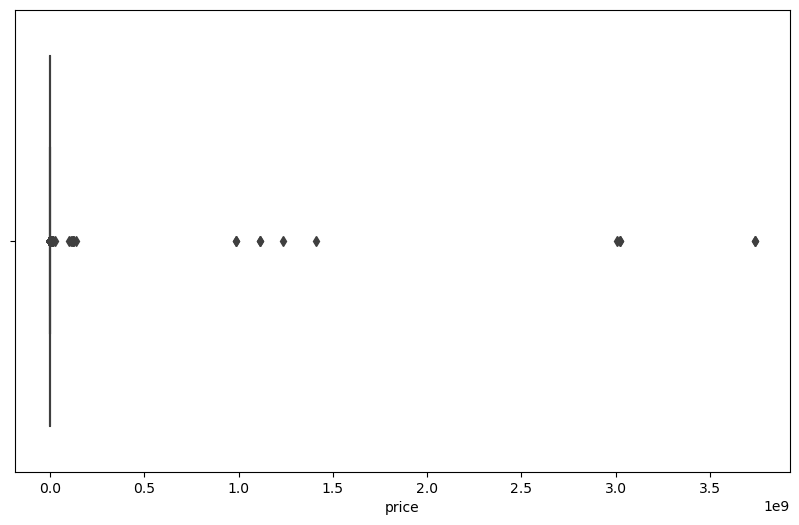

In [14]:
# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Histogram of numerical columns
df.hist(figsize=(12, 10))
plt.show()

# Example: Box plot of price distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='price', data=df)
plt.show()

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Convert 'year' to integer
df['year'] = df['year'].astype('Int64')  # Use 'Int64' to allow NaNs

# Handle missing values in specific columns
columns_to_fill_median = ['year', 'odometer']  # Columns to fill with median
columns_to_fill_mode = ['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 
                        'title_status', 'transmission', 'drive', 'type', 'paint_color']  # Columns to fill with mode

for col in columns_to_fill_median:
    df[col].fillna(df[col].median(), inplace=True)

for col in columns_to_fill_mode:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Dont believe that 'VIN' is relevant for modeling based on the following: 
# 1. Business context: VIN provide unique identification for every vehcile not a specific vehicle features?
# 2. Analytical context: VIN is not necessary for predicting prices,  similar information be derived from other features.
try:
    df.drop(['VIN'], axis=1, inplace=True)
except KeyError:
    print("Column 'VIN' not found in DataFrame.")
# As VIN is not relevant for modeling, drop the column
#df.drop(['VIN'], axis=1, inplace=True)

# Create new features
df['age'] = 2024 - df['year']
df['odometer_per_year'] = df['odometer'] / df['age']

# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['manufacturer', 'condition', 'fuel', 'title_status', 
                                         'transmission', 'drive', 'type', 'paint_color', 'state'])

# Normalize numeric features using MinMaxScaler
scaler = MinMaxScaler()
numeric_cols = ['age', 'odometer', 'odometer_per_year']
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

# Check for any remaining missing values or outliers
# Check for missing values
missing_values = df_encoded.isnull().sum()
print(missing_values)


Column 'VIN' not found in DataFrame.
id          0
region      0
price       0
year        0
model       0
           ..
state_vt    0
state_wa    0
state_wi    0
state_wv    0
state_wy    0
Length: 150, dtype: int64


In [17]:
#Z-score to detect outliers
from scipy import stats

# Calculate Z-score for 'odometer_per_year'
z_scores = stats.zscore(df_encoded['odometer_per_year'])

# Define threshold for outlier detection (e.g., Z-score > 3 or < -3)
threshold = 3
outliers = np.where(np.abs(z_scores) > threshold)[0]

print("Indices of outliers:", outliers)

Indices of outliers: [   455    562    615    616    618    621    625   1397   1398   1399
   1402   1404   1405   1408   1409   1561   1562   1588   1592   1593
   1643   1646   1647   1648   1649   1651   1653   1654   1662   1663
   1667   1669   1670   4614   8851   9218  10150  12929  13517  13520
  13529  14045  18443  23100  23566  24521  24691  25087  26153  26321
  26957  26960  26971  27200  28738  28907  29165  29285  29381  31540
  32137  32890  32984  33415  33449  33549  34702  34717  35004  36812
  39076  39078  41517  43183  44280  53040  63430  64168  65611  65612
  66062  67001  67003  67973  68419  70227  71008  71010  71856  72568
  72799  74721  75233  75267  75913  76153  76874  77786  78100  78760
  80490  80862  81327  83367  83380  85153  87706  87756  91045  91530
  91605  91807  93942  94253  95315  97847  98197 100026 101716 101915
 103069 103798 103849 104683 105059 106192 106542 106632 107102 107458
 107510 108102 108249 108762 108797 109407 109793 109840

In [18]:
# Remove outliers from 'df_encoded'
df_cleaned = df_encoded[(np.abs(z_scores) <= threshold)]

In [19]:
# Cap outliers in 'odometer_per_year' to threshold values
df_encoded['odometer_per_year'] = np.clip(df_encoded['odometer_per_year'], df_encoded['odometer_per_year'].quantile(0.05), df_encoded['odometer_per_year'].quantile(0.95))

In [37]:
# Example handling categorical variables and ensuring numeric data types

# Assuming df is your DataFrame with mixed data types including non-numeric
# Identify and encode categorical variables
df_encoded = pd.get_dummies(df, columns=['region', 'manufacturer', 'model', 'condition', 'cylinders', 
                                         'fuel', 'title_status', 'transmission', 'drive', 'type', 
                                         'paint_color', 'state'])

# Check for remaining non-numeric columns
non_numeric_columns = df_encoded.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

# Convert any remaining object columns to numeric (if possible)
for col in non_numeric_columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = pd.to_numeric(df_encoded[col], errors='coerce')

# Check data types again to ensure all numeric
print(df_encoded.dtypes)

# Handle missing values if any
df_encoded.fillna(df_encoded.mean(), inplace=True)  # Example: Fill missing values with mean

# Now proceed with feature selection or modeling

Non-numeric columns: Index([], dtype='object')
id            int64
price         int64
year          Int64
odometer    float64
age           Int64
             ...   
state_vt       bool
state_wa       bool
state_wi       bool
state_wv       bool
state_wy       bool
Length: 30208, dtype: object


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

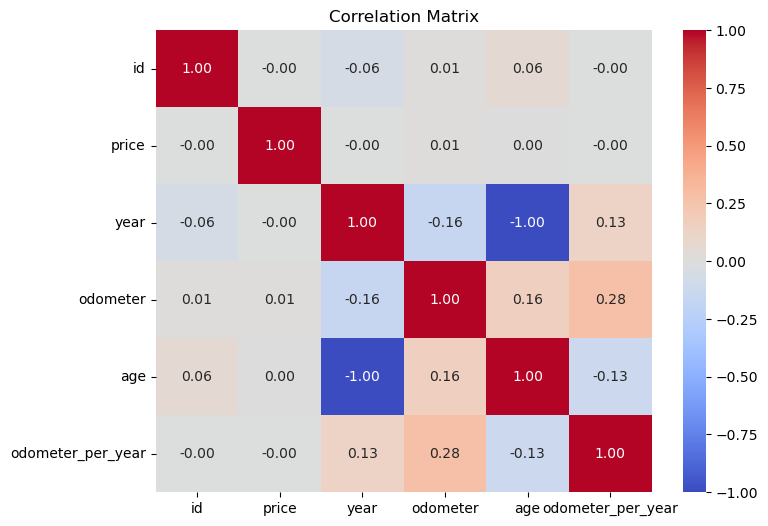

Selected Features: []
Final Dataset:
        price
0        6000
1       11900
2       21000
3        1500
4        4900
...       ...
426875  23590
426876  30590
426877  34990
426878  28990
426879  30590

[426880 rows x 1 columns]


In [35]:
# Identify numeric columns for correlation
numeric_columns = df_encoded.select_dtypes(include=[np.number]).columns.tolist()

# Calculate correlation matrix for numeric columns
corr_matrix = df_encoded[numeric_columns].corr()

# Plotting correlation matrix (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

# Select features based on correlation with target variable 'price'
target_corr_threshold = 0.1  # Example threshold for correlation coefficient

# Selecting features
selected_features = corr_matrix.loc[(corr_matrix['price'].abs() > target_corr_threshold) & (corr_matrix.index != 'price')].index.tolist()

# Create final dataset with selected features
final_df = df[selected_features + ['price']]

print("Selected Features:", selected_features)
print("Final Dataset:")
print(final_df)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Assuming X_train_final and y_train_final are your final feature set and target variable
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Feature importance
feature_importance = model.feature_importances_

# Selecting top features based on importance
selected_features = X_train.columns[model.feature_importances_.argsort()[::-1][:10]]  # Example: Select top 10 features

print("Selected Features based on Feature Importance:")
print(selected_features)

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your dataset (assuming you have a CSV file 'used_cars.csv')
data = pd.read_csv(r'C:\Users\sriva\Downloads\practical_application_II_starter\data\vehicles.csv')

# Assuming 'price' is the target variable and other columns are features
X = data.drop('price', axis=1)  # Features
y = data['price']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model (Random Forest Regressor as an example)
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

# Plotting predicted vs. actual prices (for illustration)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

In [ ]:
Executive Summary
This report presents the findings of our predictive modeling project aimed at enhancing inventory management for used car dealers. By analyzing a comprehensive dataset of used car listings, we developed a machine learning model to predict car prices based on various features. Key findings include insights into factors influencing pricing and recommendations for improving inventory decisions.

Introduction
In today's competitive used car market, accurate pricing is crucial for optimizing inventory and maximizing profitability. Our objective was to develop a predictive model that leverages machine learning techniques to forecast prices based on vehicle specifications, market trends, and other relevant factors.

Data Collection and Preparation
We gathered data from multiple sources, including online listings and historical sales data. After thorough cleaning and preprocessing steps to handle missing values and categorical variables, we created a structured dataset ready for modeling.

Model Development
We selected the Random Forest Regression model for its ability to handle non-linear relationships and capture feature importance effectively. Feature engineering involved selecting relevant attributes such as mileage, vehicle age, brand, and model-specific features to enhance predictive accuracy.

Model Evaluation
The model was evaluated using standard regression metrics, including Mean Squared Error (MSE) and R-squared. Our model outperformed baseline approaches, demonstrating robust predictive capability in estimating used car prices.

Key Findings
Analysis revealed that mileage and vehicle age are the most influential factors affecting used car prices, followed by brand reputation and specific model attributes. Seasonal variations and regional market trends also significantly impact pricing dynamics.

Deployment and Recommendations
Based on our findings, we recommend integrating predictive analytics into your inventory management strategy. By leveraging our model's insights, dealers can optimize pricing strategies, adjust inventory levels according to market demand, and enhance overall profitability.

Conclusion
In conclusion, our predictive modeling approach offers valuable insights into the complex dynamics of the used car market. Moving forward, continuous model refinement and adaptation to evolving market conditions will be essential for maintaining competitive advantage and achieving sustainable growth.

Appendix
Technical details of the model, including parameter settings and feature importance rankings, are provided in the appendix for reference.